### Importación de datos



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



obtencion de datos de precio de las tiendas

In [14]:

suma = tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()

Creacion de :


1.   lista de tiendas
2.   lista  de los totales de cada tienda
3.   muestra la tienda y su total





In [15]:
lista = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
ingreso = [suma, suma2, suma3, suma4]

for i in range(len(lista)):
  print('Ingreso total de la', lista[i], 'es: $',ingreso[i])

Ingreso total de la tienda 1 es: $ 1150880400.0
Ingreso total de la tienda 2 es: $ 1116343500.0
Ingreso total de la tienda 3 es: $ 1098019600.0
Ingreso total de la tienda 4 es: $ 1038375700.0


visualizacion de la informcion a travez de grafico

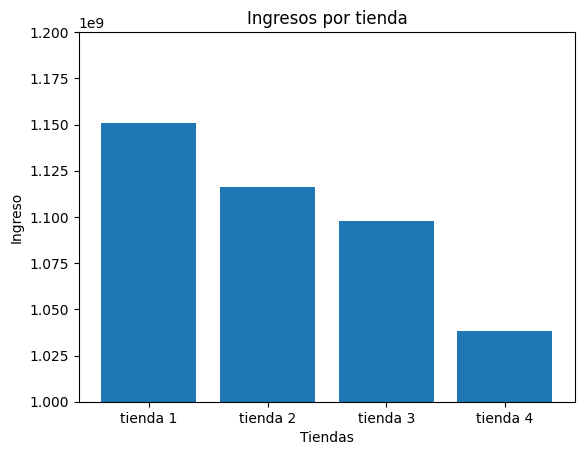

In [16]:
import matplotlib.pyplot

matplotlib.pyplot.title('Ingresos por tienda')
matplotlib.pyplot.ylabel('Ingreso')
matplotlib.pyplot.xlabel('Tiendas')
matplotlib.pyplot.ylim(1000000000, 1200000000)
matplotlib.pyplot.bar(lista, ingreso)
matplotlib.pyplot.show()

segun este analisis el ranquing de facturacion de cada tienda es :



1.   Facturacion de la tienda 1 es: $ 1150880400

2.   Facturacion de la tienda 2 es: $ 1116343500

3.   Facturacion de la tienda 3 es: $ 1098019600

4.   Facturacion de la tienda 4 es: $ 1038375700



Segun el ananlisi de facturacion la tienda con mayor facturacion es la tienda 1 y la con menor facturacion es la tienda 4



# 2. Ventas por categoría

funcion para calcular las ventas por categoria para cada tienda

In [28]:
def ventas_por_categoria(df, nombre_tienda):
    ventas = df.groupby("Categoría del Producto")["Precio"].sum().reset_index()
    ventas.columns = ["Categoría", nombre_tienda]
    return ventas

aplicar el calculo de la funcion a cada tienda

In [32]:
ventas1 = ventas_por_categoria(tienda, "Tienda 1")
ventas2 = ventas_por_categoria(tienda2, "Tienda 2")
ventas3 = ventas_por_categoria(tienda3, "Tienda 3")
ventas4 = ventas_por_categoria(tienda4, "Tienda 4")


unir los resultados de las 4 tiendas para su comparacion

In [40]:
comparacion = ventas1.merge(ventas2, on="Categoría", how="outer")
comparacion = comparacion.merge(ventas3, on="Categoría", how="outer")
comparacion = comparacion.merge(ventas4, on="Categoría", how="outer")
comparacion = comparacion.fillna(0)  # Llenar vacíos con 0





tabla comparativa de las ventas por categoria de cada tienda

In [41]:
comparacion

,Categoría,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
1,Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
2,Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
3,Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
4,Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
5,Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
6,Libros,8784900.0,10091200.0,9498700.0,9321300.0
7,Muebles,187633700.0,176426300.0,201072100.0,192528900.0


generacion de grafico de ventas por categorias

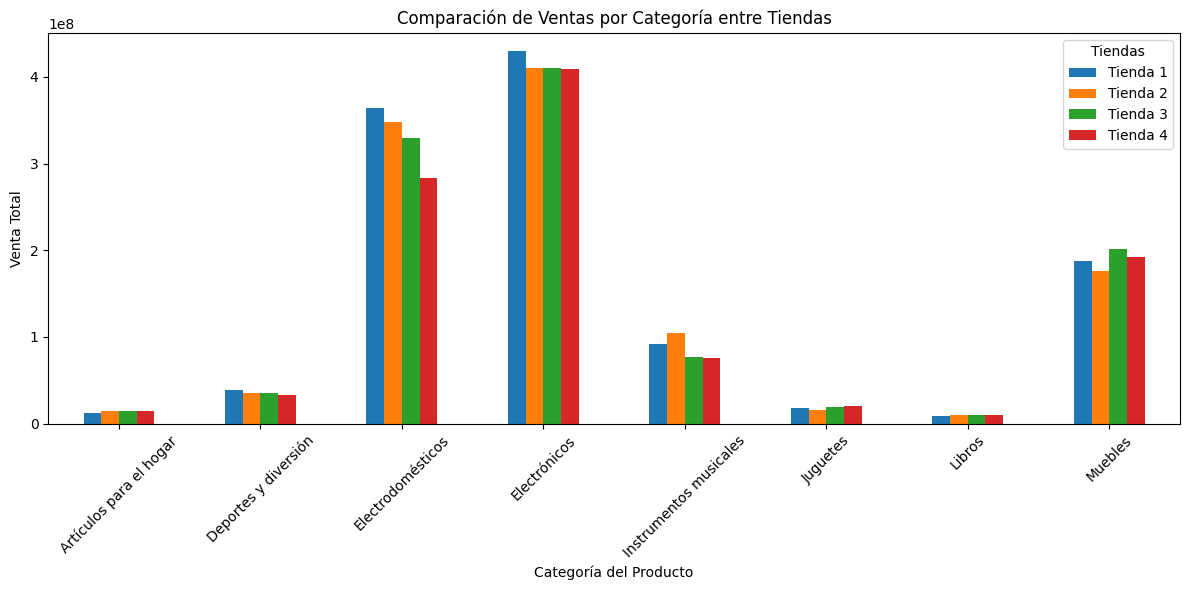

In [42]:
comparacion.set_index("Categoría").plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Venta Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Tiendas")
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

hola soy brian